In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df1= pd.read_csv("D:\\Datasets\\true_car_listings.csv")

In [3]:
df1.shape

(852122, 8)

In [4]:
df2= pd.read_csv("D:\\Datasets\\tc20171021.csv", error_bad_lines=False, warn_bad_lines=False)

C:\Users\smrit\AppData\Local\Temp\ipykernel_25320\434625977.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df2= pd.read_csv("D:\\Datasets\\tc20171021.csv", error_bad_lines=False, warn_bad_lines=False)
C:\Users\smrit\AppData\Local\Temp\ipykernel_25320\434625977.py:1: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df2= pd.read_csv("D:\\Datasets\\tc20171021.csv", error_bad_lines=False, warn_bad_lines=False)


In [5]:
df2.head()

,Id,Price,Year,Mileage,City,State,Vin,Make,Model
0,1,16472,2015,18681,Jefferson City,MO,KL4CJBSBXFB267643,Buick,EncoreConvenience
1,2,15749,2015,27592,Highland,IN,KL4CJASB5FB245057,Buick,EncoreFWD
2,3,16998,2015,13650,Boone,NC,KL4CJCSB0FB264921,Buick,EncoreLeather
3,4,15777,2015,25195,New Orleans,LA,KL4CJASB4FB217542,Buick,EncoreFWD
4,5,16784,2015,22800,Las Vegas,NV,KL4CJBSB3FB166881,Buick,EncoreConvenience


In [6]:
df2.shape

(1216250, 9)

In [7]:
df= pd.concat([df1, df2], ignore_index=True)
df= df.drop('Id', axis=1)

In [8]:
df.shape

(2068372, 8)

In [9]:
df.tail()

,Price,Year,Mileage,City,State,Vin,Make,Model
2068367,79900,2017,25,East Hanover,NJ,YV4BC0ZX0H1128239,Volvo,XC90T8
2068368,80895,2017,10,Corte Madera,CA,YV4BC0ZX0H1124188,Volvo,XC90T8
2068369,68755,2018,2500,Englewood,NJ,YV4A22PL4J1212676,Volvo,XC90T6
2068370,72260,2017,3201,Englewood,NJ,YV4A22PL3H1186162,Volvo,XC90T6
2068371,60240,2017,8342,San Leandro,CA,YV4A22NLXH1006162,Volvo,V90


In [10]:
df.describe()

,Price,Year,Mileage
count,2.068372e+06,2.068372e+06,2.068372e+06
mean,2.117289e+04,2.013300e+03,5.274318e+04
std,1.334331e+04,3.430814e+00,6.836142e+04
min,1.500000e+03,1.997000e+03,5.000000e+00
25%,1.299500e+04,2.012000e+03,2.391000e+04
50%,1.800000e+04,2.014000e+03,4.042300e+04
75%,2.681700e+04,2.016000e+03,7.250400e+04
max,4.995000e+05,2.018000e+03,7.758776e+07


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068372 entries, 0 to 2068371
Data columns (total 8 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   Price    int64 
 1   Year     int64 
 2   Mileage  int64 
 3   City     object
 4   State    object
 5   Vin      object
 6   Make     object
 7   Model    object
dtypes: int64(3), object(5)
memory usage: 126.2+ MB


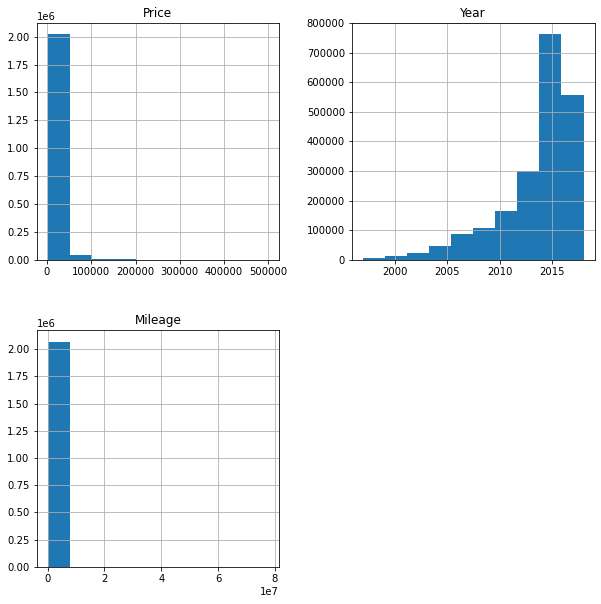

In [12]:
df.hist(figsize=(10,10))
plt.show()

In [13]:
df.isnull().sum()

Price      0
Year       0
Mileage    0
City       0
State      0
Vin        0
Make       0
Model      0
dtype: int64

##### Handling the Outliers

<AxesSubplot:title={'center':'Boxplot for Mileage'}, xlabel='Mileage'>

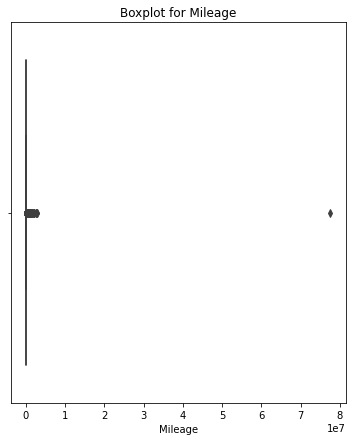

In [14]:
plt.figure(figsize=(6,7))
plt.title('Boxplot for Mileage')
sns.boxplot(x=df.Mileage)

In [15]:
Q1= df['Mileage'].quantile(0.25)
Q3= df['Mileage'].quantile(0.75)
IQR= Q3-Q1

In [16]:
print("Old Shape: ", df.shape)
 
# Upper bound
upper = np.where(df['Mileage'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['Mileage'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
 
print("New Shape: ", df.shape)

Old Shape:  (2068372, 8)
New Shape:  (1992125, 8)


#### We see that there are 76247 outliers, We remove these outliers from the data

<AxesSubplot:xlabel='Mileage'>

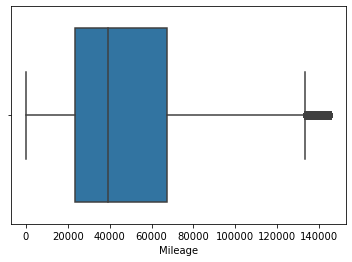

In [17]:
sns.boxplot(x=df.Mileage)

#### Similarly working on other numerical variables

<AxesSubplot:title={'center':'Boxplot for Year'}, xlabel='Year'>

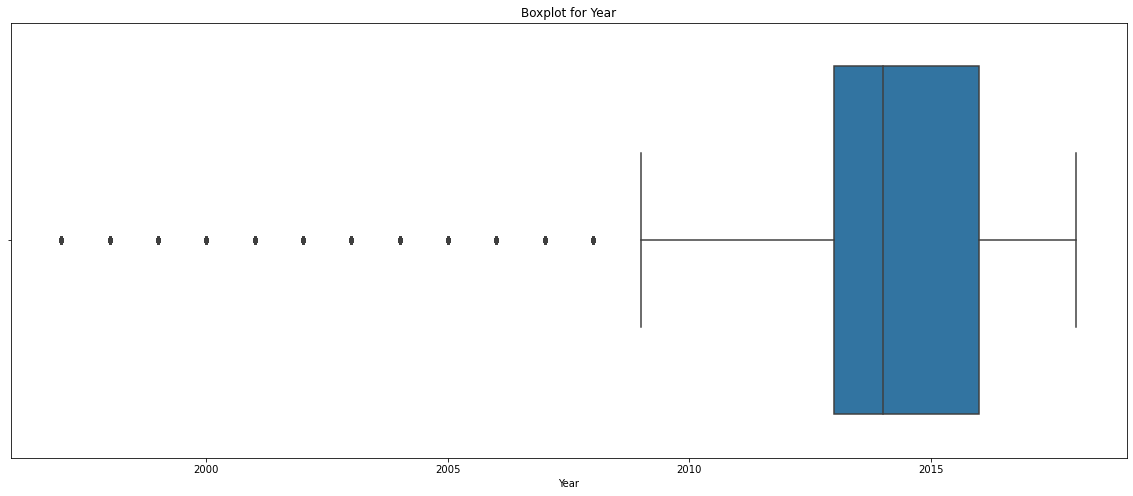

In [18]:
plt.figure(figsize=(20,8))
plt.title('Boxplot for Year')
sns.boxplot(x=df.Year)

<AxesSubplot:xlabel='Year', ylabel='count'>

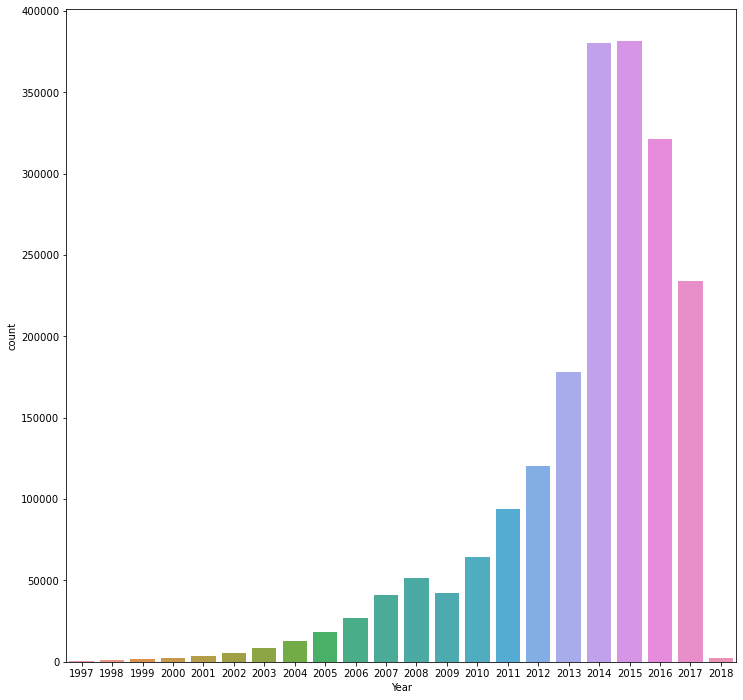

In [19]:
plt.figure(figsize=(12,12))
sns.countplot(x='Year', data=df)

In [20]:
Q1= df['Year'].quantile(0.25)
Q3= df['Year'].quantile(0.75)
IQR= Q3-Q1
Lower= Q1 - 1.5*IQR
Upper= Q3 + 1.5*IQR

In [21]:
Lower

2008.5

In [22]:
Upper

2020.5

In [23]:
Year_outliers= df[(df['Year']>Upper) | (df['Year']<Lower)]
Year_outliers.shape

(173733, 8)

In [24]:
Year_outliers.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
19,7990,2007,60552,Fairlawn,NJ,JH4CL96857C019060,Acura,TSX4dr
46,8995,2007,53525,South Hackensack,NJ,JH4CL96807C008922,Acura,TSX4dr
55,9995,2006,62983,Omaha,NE,JH4CL96886C009248,Acura,TSXAutomatic
77,11991,2008,59594,Albuquerque,NM,JH4CL968X8C011232,Acura,TSX4dr
97,8572,2004,51293,Fairfax,VA,JH4CL96834C036838,Acura,TSXAutomatic


##### We see that there is significant amount of data before and after the upper and lower quantiles, thereforeit is not feasible to change the Year data to Upper or Lower quantiles

<AxesSubplot:title={'center':'Boxplot for Price'}, xlabel='Price'>

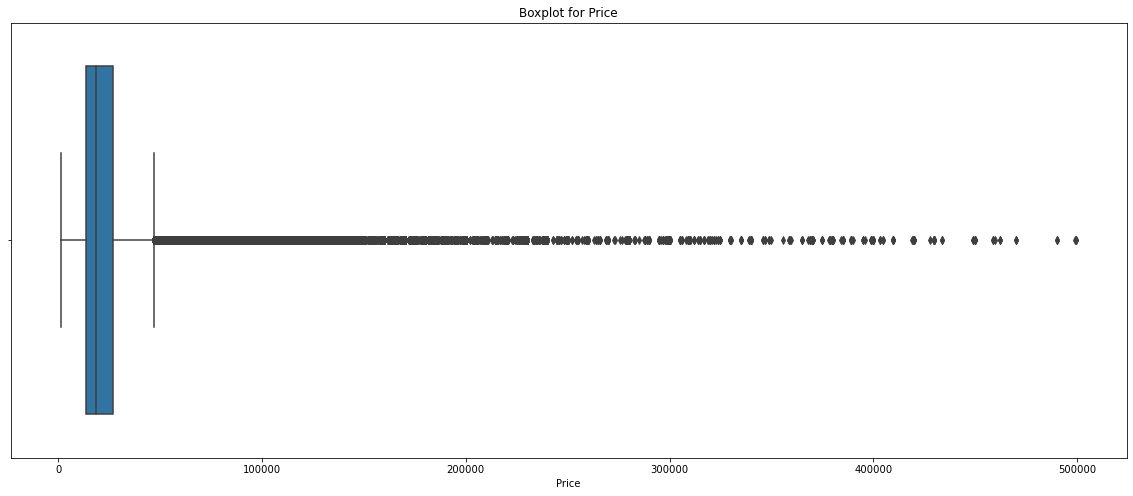

In [25]:
plt.figure(figsize=(20,8))
plt.title('Boxplot for Price')
sns.boxplot(x=df.Price)

In [26]:
Min= df['Price'].quantile(0.01)
Max= df['Price'].quantile(0.99)

In [27]:
Min

4995.0

In [28]:
Max

60988.0

In [29]:
Price_outliers= df[(df['Price']>Max) | (df['Price']<Min)]
Price_outliers.shape

(38251, 8)

In [30]:
df = df[df['Price'] < Max]
df.shape

(1972196, 8)

<AxesSubplot:title={'center':'Boxplot for Price'}, xlabel='Price'>

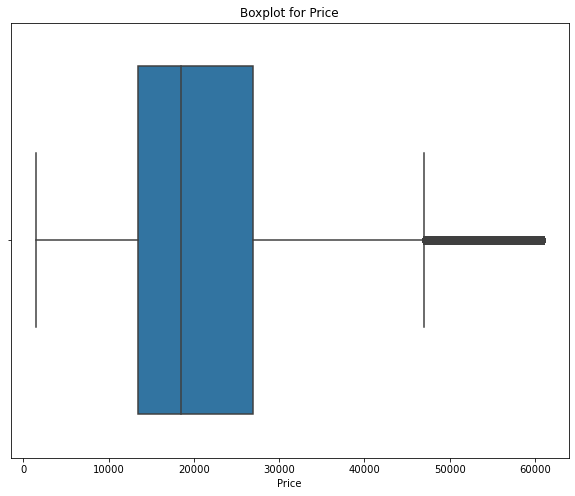

In [31]:
plt.figure(figsize=(10,8))
plt.title('Boxplot for Price')
sns.boxplot(x=df.Price)

In [32]:
df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


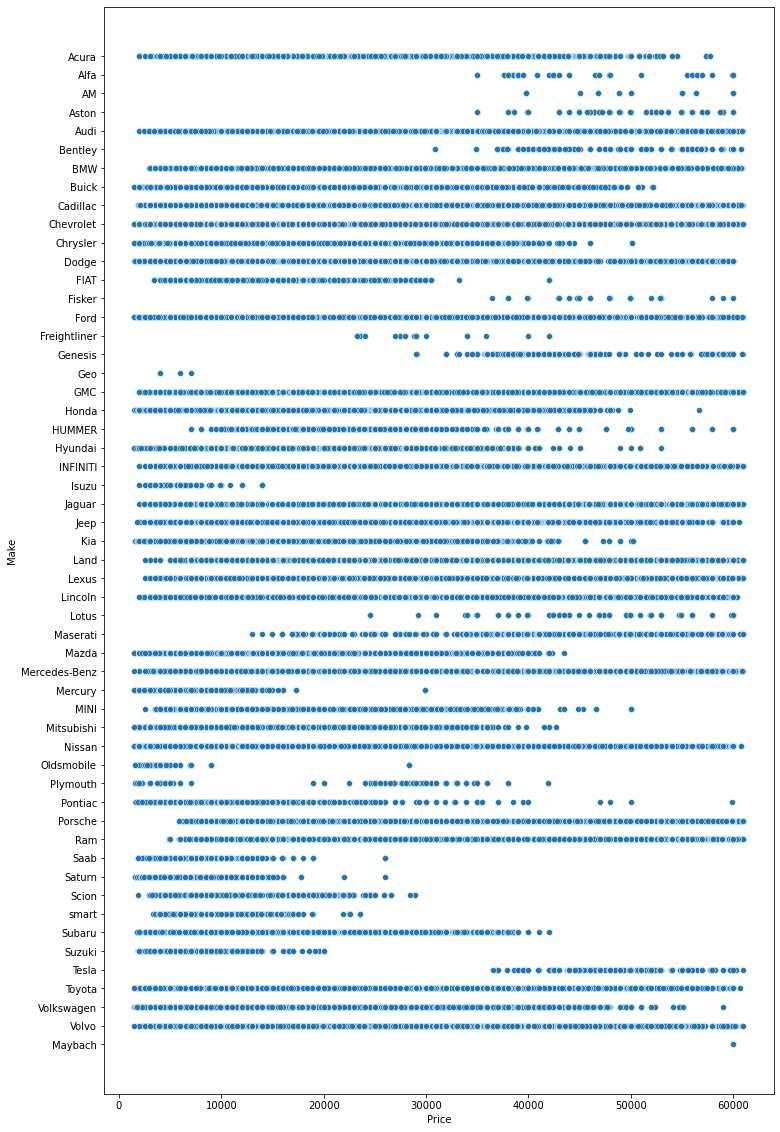

In [33]:
plt.figure(figsize=(12,20))
sns.scatterplot(x=df['Price'], y = df['Make'])
plt.show()

##### As shown in the graph, most of the cars have their prices around the range [0,200000] , except some luxury cars like Ferrari, Lambo, Mercedes and Rolls Royce. 

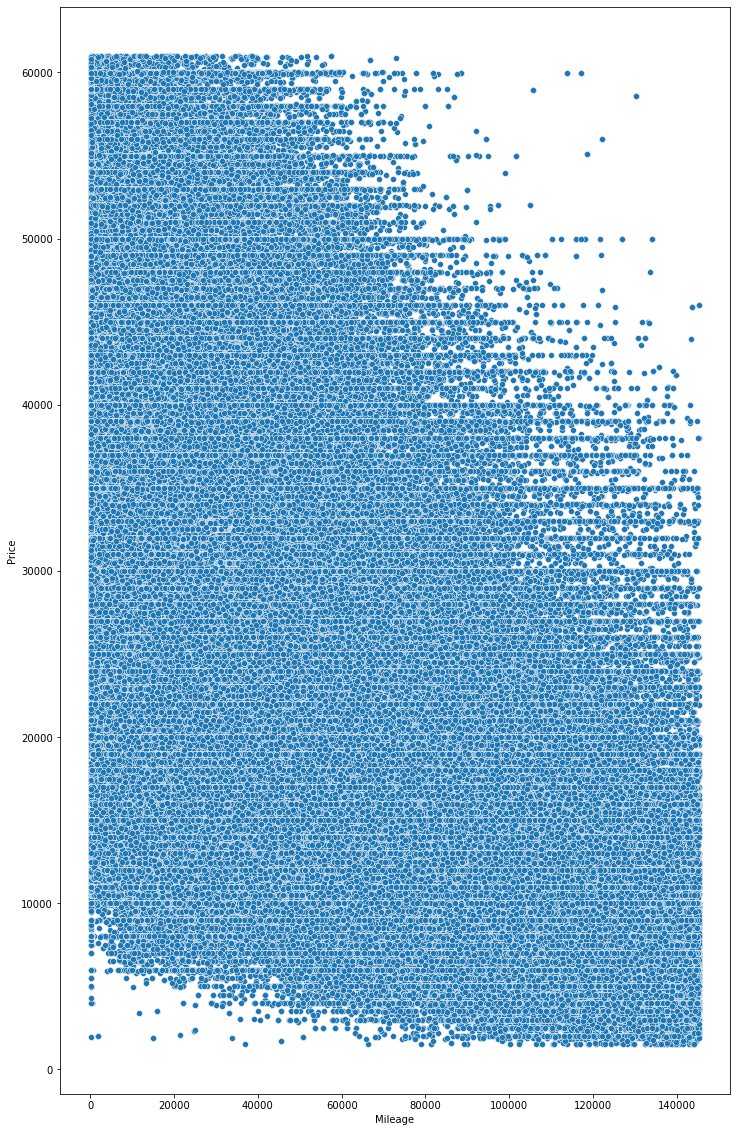

In [34]:
plt.figure(figsize=(12,20))
sns.scatterplot(x=df['Mileage'], y = df['Price'])
plt.show()

##### We  see that there is a negative relationship between Price and Mileage, i.e. as Mileage increases the value of car decreases

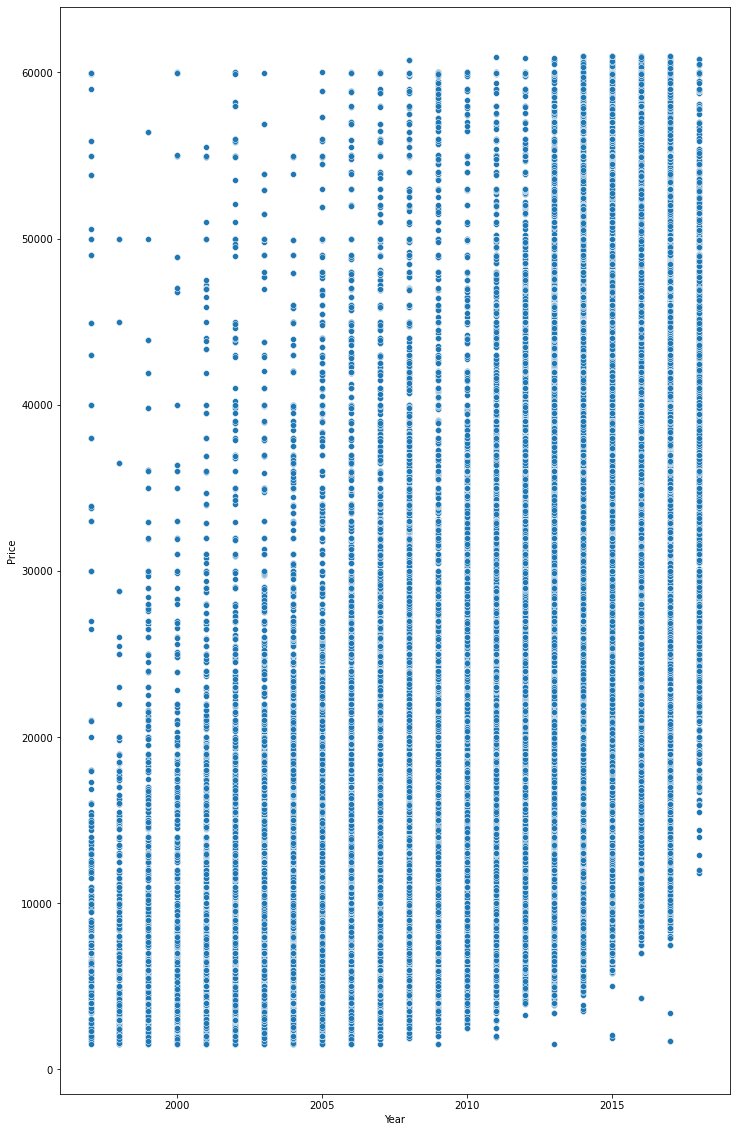

In [35]:
plt.figure(figsize=(12,20))
sns.scatterplot(x=df['Year'], y = df['Price'])
plt.show()

##### Prices tend to be higher as cars are more recent, and viceversa.

<AxesSubplot:xlabel='Make', ylabel='Price'>

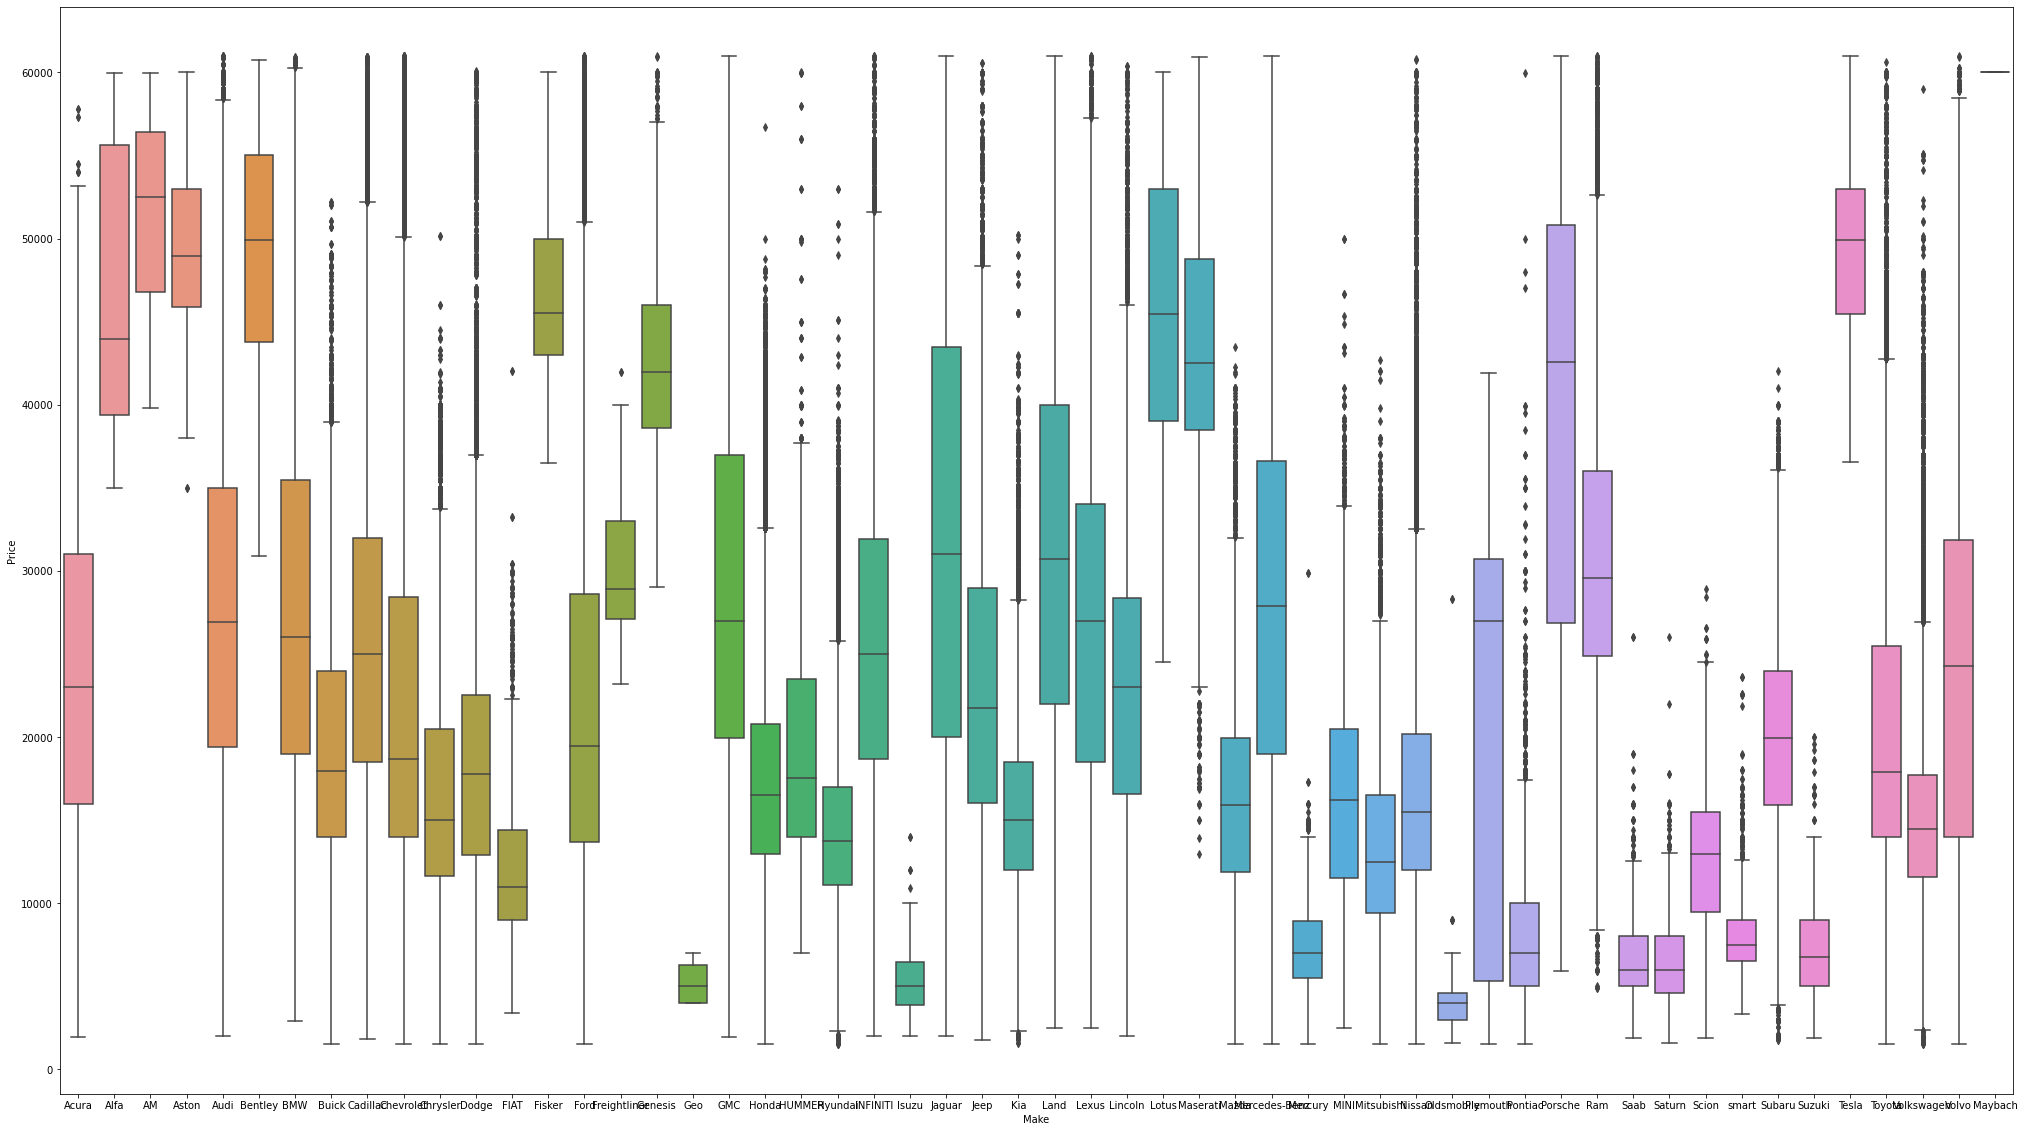

In [36]:
plt.subplots(figsize=(35, 20))
sns.boxplot(x='Make', y='Price', data=df)

##### We see that there are quite some outliers in the medium budget cars like Audi, Jeep, Ford, this is because they also produce some high end cars that are over their normal prices. These outliers must not be removed as they represent variedness in the type of cars companies produce

### Correlation between variables

In [37]:
corr = df.corr()
corr.sort_values(["Price"], ascending = False, inplace = True)
corr.Price

Price      1.000000
Year       0.447360
Mileage   -0.466952
Name: Price, dtype: float64

<AxesSubplot:>

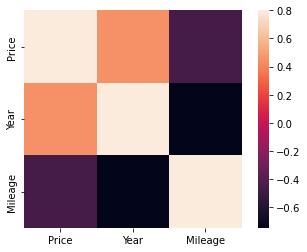

In [38]:
sns.heatmap(corr, vmax=.8, square=True)

##### There is a mild positive correlation between Year and Price and a mild negative correlation between Year and Mileage.Moreover the is a strong negative correlation between Mileage and Year, meaning that the older is the car, the higher will be its mileage.

In [39]:
df.State.unique()

array([' TX', ' NY', ' CO', ' UT', ' FL', ' CT', ' ID', ' ND', ' CA',
       ' NJ', ' OH', ' VA', ' IN', ' AZ', ' OR', ' KS', ' NE', ' MA',
       ' MD', ' GA', ' MN', ' HI', ' LA', ' NM', ' IL', ' AL', ' PA',
       ' SC', ' NC', ' WA', ' WI', ' OK', ' KY', ' MS', ' MO', ' ME',
       ' AR', ' MI', ' NV', ' TN', ' Fl', ' NH', ' DE', ' WV', ' Az',
       ' VT', ' SD', ' IA', ' RI', ' ga', ' Oh', ' MT', ' DC', ' AK',
       ' Va', ' WY', ' Md', ' Ca', ' Ga'], dtype=object)

In [40]:
df['State']= df['State'].str.strip()
df['State']= df['State'].str.upper()
df['State'].unique()

array(['TX', 'NY', 'CO', 'UT', 'FL', 'CT', 'ID', 'ND', 'CA', 'NJ', 'OH',
       'VA', 'IN', 'AZ', 'OR', 'KS', 'NE', 'MA', 'MD', 'GA', 'MN', 'HI',
       'LA', 'NM', 'IL', 'AL', 'PA', 'SC', 'NC', 'WA', 'WI', 'OK', 'KY',
       'MS', 'MO', 'ME', 'AR', 'MI', 'NV', 'TN', 'NH', 'DE', 'WV', 'VT',
       'SD', 'IA', 'RI', 'MT', 'DC', 'AK', 'WY'], dtype=object)

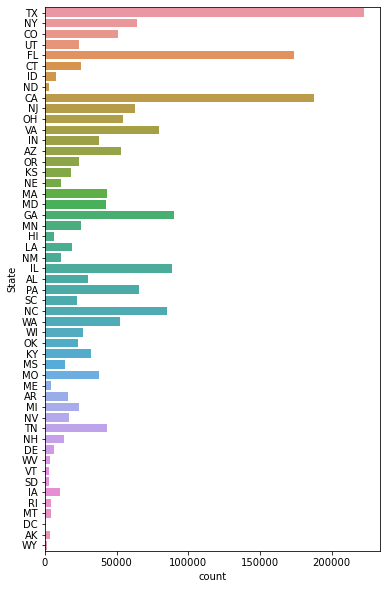

In [41]:
plt.figure(figsize=(6,10))
sns.countplot(y='State', data = df)
plt.show()

##### Most of the sales are done in TX, CA and FL

## FEATURE ENGINEERING

In [42]:
df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1972196 entries, 0 to 2068371
Data columns (total 8 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   Price    int64 
 1   Year     int64 
 2   Mileage  int64 
 3   City     object
 4   State    object
 5   Vin      object
 6   Make     object
 7   Model    object
dtypes: int64(3), object(5)
memory usage: 135.4+ MB


In [44]:
X= df[['Mileage','Year']]
y= df['Price']
discrete_variables= X.dtypes == int

In [45]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_variables)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_variables)

In [46]:
mi_scores

Year       0.205867
Mileage    0.200668
Name: MI Scores, dtype: float64

#### Creating features

In [47]:
df['Age']= 2022 - df['Year']

Text(0.5, 1.0, 'Price and Age_of_car Relationship')

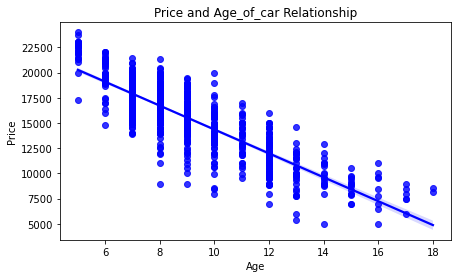

In [48]:
plt.figure(figsize=[7,4])

sns.regplot(x=df['Age'][:1000], y=df['Price'][:1000], color = 'blue', marker = 'o').set_title("Price and Age_of_car Relationship")

In [49]:
df['age_mileage_ratio']= df['Age']/df['Mileage']

In [50]:
df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model,Age,age_mileage_ratio
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed,8,0.000224
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed,9,0.000459
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed,9,0.000184
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed,8,0.000200
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic,6,0.000271


<AxesSubplot:xlabel='age_mileage_ratio', ylabel='Price'>

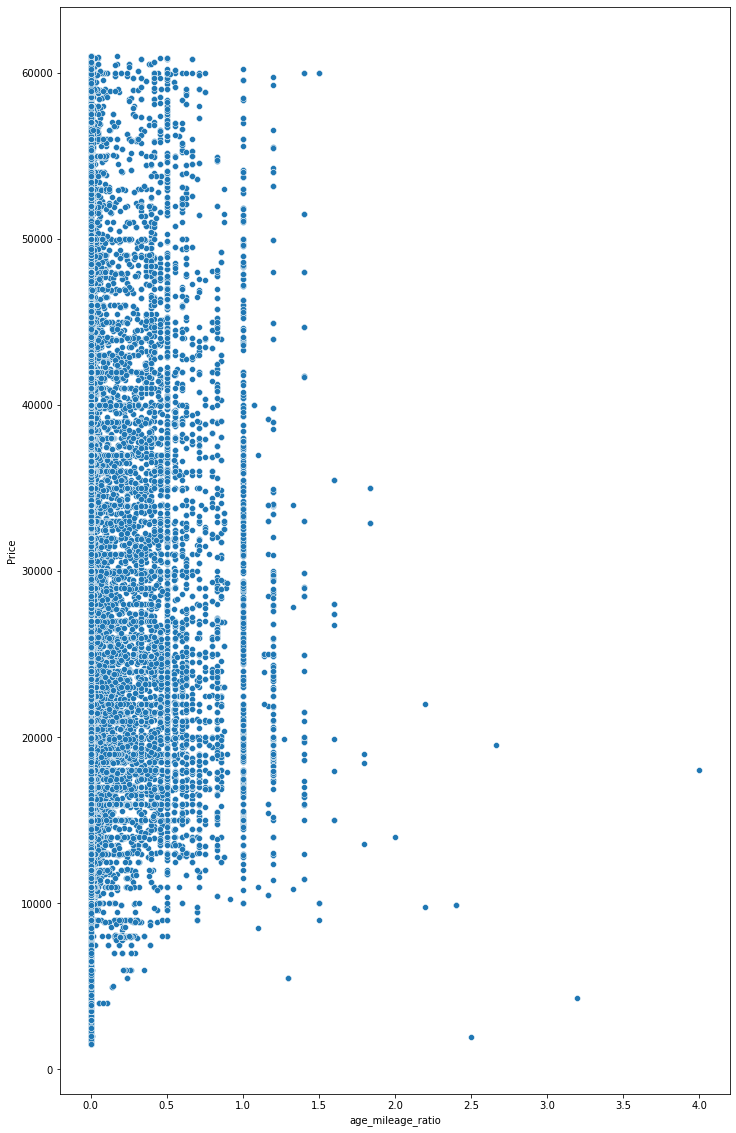

In [51]:
plt.figure(figsize=(12,20))
sns.scatterplot(x=df['age_mileage_ratio'], y = df['Price'])

#### We see that the ratio is mostly spread along the interval [0,1]. the less the ratio, the more is the mileage of car as compared to it's age. The cars with less ratio are older cars with high mileage. We will classify these cars into another column. 

In [52]:
conditions= [(df['age_mileage_ratio']<0.00028),
             (df['age_mileage_ratio']>=0.00028)&(df['age_mileage_ratio']<0.005),(df['age_mileage_ratio']>=0.005)]
df['used_level']= np.select(conditions,['Highly_used','Moderately_used','Low used'])

<AxesSubplot:xlabel='used_level', ylabel='count'>

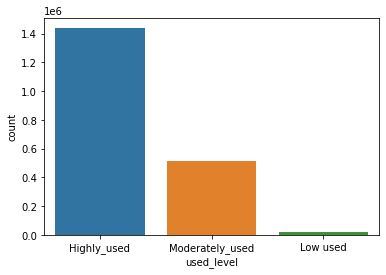

In [53]:
sns.countplot(x=df['used_level'])

In [54]:
df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model,Age,age_mileage_ratio,used_level
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed,8,0.000224,Highly_used
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed,9,0.000459,Moderately_used
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed,9,0.000184,Highly_used
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed,8,0.000200,Highly_used
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic,6,0.000271,Highly_used


In [55]:
df.groupby('used_level')['Price'].mean()

used_level
Highly_used        19121.201722
Low used           29648.790488
Moderately_used    25773.494191
Name: Price, dtype: float64

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1972196 entries, 0 to 2068371
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Price              int64  
 1   Year               int64  
 2   Mileage            int64  
 3   City               object 
 4   State              object 
 5   Vin                object 
 6   Make               object 
 7   Model              object 
 8   Age                int64  
 9   age_mileage_ratio  float64
 10  used_level         object 
dtypes: float64(1), int64(4), object(6)
memory usage: 180.6+ MB


In [57]:
#sns.lmplot(x="Mileage", y="Price", hue="used_level", data=df)

<AxesSubplot:xlabel='Age', ylabel='count'>

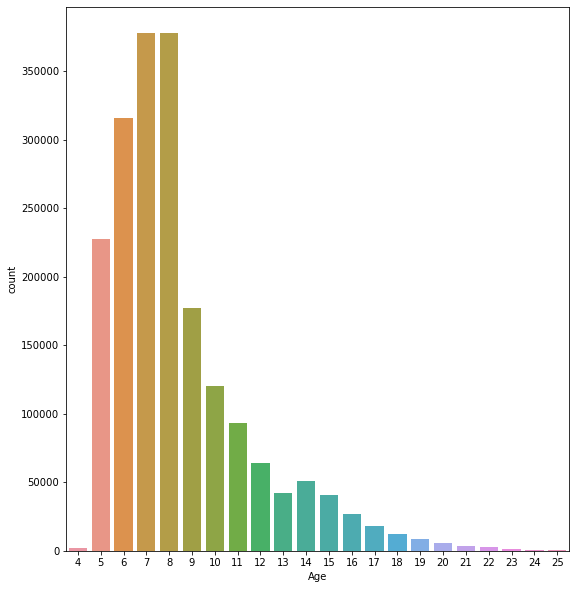

In [58]:
plt.figure(figsize=(9,10))
sns.countplot(x='Age', data=df)

In [59]:
conditions= [(df['Age']<10),(df['Age']>=10)]
df['new/old car']= np.select(conditions,['new_car','old_car'])

<AxesSubplot:xlabel='new/old car', ylabel='count'>

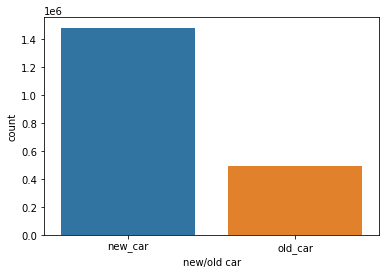

In [60]:
sns.countplot(x=df['new/old car'])

In [61]:
df.groupby('new/old car')['Price'].mean()

new/old car
new_car    23292.876249
old_car    13935.389945
Name: Price, dtype: float64

In [62]:
l1 = ['HOUSTON', 'SAN ANTONIO', 'LOUISVILLE', 'AUSTIN', 'JACKSONVILLE', 'ORLANDO', 'MIAMI', 'COLORADO SPRINGS', 'RALEIGH', 'COLUMBIA', 'PHILADELPHIA', 'DALLAS', 'PHOENIX', 'TUCSON', 'LAS VEGAS', 'TAMPA', 'COLUMBUS', 'MARIETTA', 'CHARLOTTE', 'VICTORVILLE']
l2 = ['CHICAGO', 'PLANO', 'INDIANAPOLIS', 'EL PASO', 'ALBUQUERQUE', 'SPRINGFIELD', 'ARLINGTON', 'PUYALLUP', 'SACRAMENTO', 'FORT WORTH', 'CHANTILLY', 'OKLAHOMA CITY', 'CONCORD', 'MANASSAS', 'LAKEWOOD', 'FREDERICKSBURG', 'SAN DIEGO', 'DULUTH', 'RICHMOND', 'CINCINNATI', 'MADISON', 'CARROLLTON', 'TACOMA', 'UNION CITY', 'VIRGINIA BEACH', 'ENGLEWOOD', 'FAYETTEVILLE', 'WEST PALM BEACH', 'SAN JOSE', 'WILMINGTON', 'PENSACOLA', 'HOLLYWOOD', 'SARASOTA', 'TEMPE', 'AUBURN', 'GAINESVILLE', 'TULSA', 'SCOTTSDALE', 'PORTLAND', 'ESCONDIDO', 'NASHVILLE', 'MESA', 'DORAL', 'OMAHA', 'SANFORD', 'LAFAYETTE', 'LITTLE ROCK', 'PEORIA', 'BALTIMORE', 'CORPUS CHRISTI', 'AURORA', 'MEMPHIS', 'BEDFORD', 'MCKINNEY', 'BURLINGTON', 'CHESAPEAKE', 'HONOLULU', 'EL CAJON', 'KILLEEN', 'DENVER', 'MILWAUKEE', 'KANSAS CITY', 'SCHAUMBURG', 'SAVANNAH', 'BUFORD', 'ALEXANDRIA', 'LEXINGTON', 'LITTLETON', 'FAIRFIELD', 'GREENSBORO', 'GREENVILLE', 'GRAPEVINE', 'ATLANTA', 'MERRIAM', 'HENDERSON', 'BELLEVUE', 'FREMONT', 'LONG ISLAND CITY', 'SEATTLE', 'SALT LAKE CITY']

In [63]:
df.City=df.City.apply(str.upper)
def importance(value):
    if value in l1 :
        result = 'High'
    elif value in l2 :
        result = 'Moderate'
    else:
        result = 'Low'
    return result


df['City Importance'] = df['City'].apply(importance)

In [64]:
df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model,Age,age_mileage_ratio,used_level,new/old car,City Importance
0,8995,2014,35725,EL PASO,TX,19VDE2E53EE000083,Acura,ILX6-Speed,8,0.000224,Highly_used,new_car,Moderate
1,10888,2013,19606,LONG ISLAND CITY,NY,19VDE1F52DE012636,Acura,ILX5-Speed,9,0.000459,Moderately_used,new_car,Moderate
2,8995,2013,48851,EL PASO,TX,19VDE2E52DE000025,Acura,ILX6-Speed,9,0.000184,Highly_used,new_car,Moderate
3,10999,2014,39922,WINDSOR,CO,19VDE1F71EE003817,Acura,ILX5-Speed,8,0.000200,Highly_used,new_car,Low
4,14799,2016,22142,LINDON,UT,19UDE2F32GA001284,Acura,ILXAutomatic,6,0.000271,Highly_used,new_car,Low


In [65]:
df.State.unique()

array(['TX', 'NY', 'CO', 'UT', 'FL', 'CT', 'ID', 'ND', 'CA', 'NJ', 'OH',
       'VA', 'IN', 'AZ', 'OR', 'KS', 'NE', 'MA', 'MD', 'GA', 'MN', 'HI',
       'LA', 'NM', 'IL', 'AL', 'PA', 'SC', 'NC', 'WA', 'WI', 'OK', 'KY',
       'MS', 'MO', 'ME', 'AR', 'MI', 'NV', 'TN', 'NH', 'DE', 'WV', 'VT',
       'SD', 'IA', 'RI', 'MT', 'DC', 'AK', 'WY'], dtype=object)

In [66]:
df['Car_count']= df.groupby('State', sort=False)["Price"].transform('count')

In [67]:
df.Car_count.unique()

array([222466,  64402,  51063,  23847, 174054,  25106,   7596,   2678,
       187966,  63047,  54284,  79726,  37404,  53129,  23518,  17865,
        11048,  43439,  42262,  90342,  25117,   6417,  19165,  11392,
        88957,  29906,  65804,  22685,  85056,  52085,  26332,  23102,
        31935,  13951,  37994,   4441,  15786,  24004,  16675,  43411,
        13472,   6001,   3445,   2588,   2607,  10806,   4361,   4178,
           47,   3778,   1456], dtype=int64)

In [68]:
df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model,Age,age_mileage_ratio,used_level,new/old car,City Importance,Car_count
0,8995,2014,35725,EL PASO,TX,19VDE2E53EE000083,Acura,ILX6-Speed,8,0.000224,Highly_used,new_car,Moderate,222466
1,10888,2013,19606,LONG ISLAND CITY,NY,19VDE1F52DE012636,Acura,ILX5-Speed,9,0.000459,Moderately_used,new_car,Moderate,64402
2,8995,2013,48851,EL PASO,TX,19VDE2E52DE000025,Acura,ILX6-Speed,9,0.000184,Highly_used,new_car,Moderate,222466
3,10999,2014,39922,WINDSOR,CO,19VDE1F71EE003817,Acura,ILX5-Speed,8,0.000200,Highly_used,new_car,Low,51063
4,14799,2016,22142,LINDON,UT,19UDE2F32GA001284,Acura,ILXAutomatic,6,0.000271,Highly_used,new_car,Low,23847


In [69]:
conditions= [(df['Car_count']>50000),
             (df['Car_count']<=50000)&(df['Car_count']>10000),(df['Car_count']<=10000)]
df['State_level']= np.select(conditions,['High_imp_state','Moderately_imp_state','Low_imp_state'])

<AxesSubplot:xlabel='State_level', ylabel='count'>

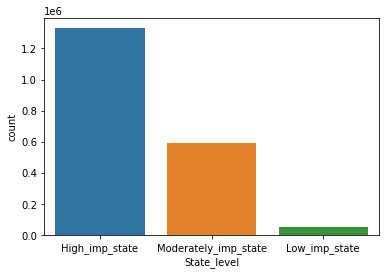

In [70]:
sns.countplot(x=df['State_level'])

In [71]:
df.groupby('State_level')['Price'].mean()

State_level
High_imp_state          20870.903087
Low_imp_state           21376.765209
Moderately_imp_state    21107.086611
Name: Price, dtype: float64

In [72]:
df_Low= df.loc[df['State_level']=='Low_imp_state']
df_Low['State'].unique()

array(['ID', 'ND', 'HI', 'ME', 'DE', 'WV', 'VT', 'SD', 'RI', 'MT', 'DC',
       'AK', 'WY'], dtype=object)

In [73]:
df_Low['State'].value_counts()

ID    7596
HI    6417
DE    6001
ME    4441
RI    4361
MT    4178
AK    3778
WV    3445
ND    2678
SD    2607
VT    2588
WY    1456
DC      47
Name: State, dtype: int64

In [74]:
### Since out of 51 states, there are only 13 states that are of low importance we can consider dropping these states

In [75]:
df.groupby('State_level')['Age'].mean()

State_level
High_imp_state          8.458616
Low_imp_state           8.886980
Moderately_imp_state    8.331682
Name: Age, dtype: float64

In [76]:
df.drop(['Vin'],axis=1,inplace=True)

In [77]:
X = df.drop('Price',axis =1)
y = df[['Price']]

In [78]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [80]:
df.head()

,Price,Year,Mileage,City,State,Make,Model,Age,age_mileage_ratio,used_level,new/old car,City Importance,Car_count,State_level
0,8995,2014,35725,EL PASO,TX,Acura,ILX6-Speed,8,0.000224,Highly_used,new_car,Moderate,222466,High_imp_state
1,10888,2013,19606,LONG ISLAND CITY,NY,Acura,ILX5-Speed,9,0.000459,Moderately_used,new_car,Moderate,64402,High_imp_state
2,8995,2013,48851,EL PASO,TX,Acura,ILX6-Speed,9,0.000184,Highly_used,new_car,Moderate,222466,High_imp_state
3,10999,2014,39922,WINDSOR,CO,Acura,ILX5-Speed,8,0.000200,Highly_used,new_car,Low,51063,High_imp_state
4,14799,2016,22142,LINDON,UT,Acura,ILXAutomatic,6,0.000271,Highly_used,new_car,Low,23847,Moderately_imp_state


In [81]:
ohe=OneHotEncoder()
ohe.fit(X[['City', 'State', 'Make', 'Model', 'used_level','new/old car' ,'City Importance', 'State_level']])

OneHotEncoder()

In [82]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['City', 'State', 'Make', 'Model', 'used_level','new/old car' ,'City Importance', 'State_level']),
                                     remainder='passthrough')

In [83]:
lr=LinearRegression()

In [84]:
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['ABBEVILLE', 'ABERDEEN', 'ABILENE', ..., 'ZELIENOPLE',
       'ZEPHYRHILLS', 'ZIONSVILLE'], dtype=object),
                                                                            array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME...
                                                                            array(['Highly_used', 'Low used', 'Moderately_used'], dtype=object),
                                                                            array(['new_car', 'old_car'], dtype=object),
                                                                            array(['High', 'Low', 'Moderate'], dtype=object),
                              

In [85]:
y_pred=pipe.predict(X_test)

In [86]:
r2_score(y_test,y_pred)

0.8726384066620749

In [88]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
pipe_xgb=make_pipeline(column_trans,xgb)

C:\Users\smrit\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [89]:
pipe_xgb.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['ABBEVILLE', 'ABERDEEN', 'ABILENE', ..., 'ZELIENOPLE',
       'ZEPHYRHILLS', 'ZIONSVILLE'], dtype=object),
                                                                            array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME...
                              gamma=0, gpu_id=-1, importance_type=None,
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=6, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=12, num_parallel_tree=1, pred

In [90]:
y_pred_xgb= pipe_xgb.predict(X_test)

In [91]:
r2_score(y_test,y_pred_xgb)

0.8017109352068508

In [92]:
from sklearn.ensemble import GradientBoostingRegressor
gbr_params = {'n_estimators': 100}

In [93]:
gbr = GradientBoostingRegressor(**gbr_params)
pipe_gbr= make_pipeline(column_trans,gbr)

In [94]:
pipe_gbr.fit(X_train,y_train)

C:\Users\smrit\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['ABBEVILLE', 'ABERDEEN', 'ABILENE', ..., 'ZELIENOPLE',
       'ZEPHYRHILLS', 'ZIONSVILLE'], dtype=object),
                                                                            array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME...
                                                                            array(['Highly_used', 'Low used', 'Moderately_used'], dtype=object),
                                                                            array(['new_car', 'old_car'], dtype=object),
                                                                            array(['High', 'Low', 'Moderate'], dtype=object),
                              

In [95]:
y_pred_gbr= pipe_gbr.predict(X_test)

In [96]:
r2_score(y_test,y_pred_gbr)

0.5618875586383205